In [169]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

print('hello world!')

hello world!


In [170]:
# Unzip the archive

import zipfile

local_zip = r"C:\Users\vutuan\Desktop\My-Projects\BTDP\archive.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [171]:
#checking data file

source_path=r"C:\Users\vutuan\Desktop\My-Projects\BTDP"
source_path_yes = os.path.join(source_path, 'Yes')
source_path_no = os.path.join(source_path, 'No')

print(f"There are {len(os.listdir(source_path_yes))} images of brain tumor.")
print(f"There are {len(os.listdir(source_path_no))} images of normal brain.")

There are 155 images of brain tumor.
There are 98 images of normal brain.


In [172]:
#create train/valid folder

root_dir=r"C:\Users\vutuan\Desktop\My-Projects\BTDP"

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path, 'training'))
    os.makedirs(os.path.join(f'{root_path}/training', 'Yes'))
    os.makedirs(os.path.join(f'{root_path}/training', 'No'))
    os.makedirs(os.path.join(root_path, 'validation'))
    os.makedirs(os.path.join(f'{root_path}/validation', 'Yes'))
    os.makedirs(os.path.join(f'{root_path}/validation', 'No'))
try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

You should not be seeing this since the upper directory is removed beforehand


In [173]:
#testing create folder

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

C:\Users\vutuan\Desktop\My-Projects\BTDP\brain_tumor_dataset
C:\Users\vutuan\Desktop\My-Projects\BTDP\no
C:\Users\vutuan\Desktop\My-Projects\BTDP\training
C:\Users\vutuan\Desktop\My-Projects\BTDP\validation
C:\Users\vutuan\Desktop\My-Projects\BTDP\yes
C:\Users\vutuan\Desktop\My-Projects\BTDP\brain_tumor_dataset\no
C:\Users\vutuan\Desktop\My-Projects\BTDP\brain_tumor_dataset\yes
C:\Users\vutuan\Desktop\My-Projects\BTDP\training\No
C:\Users\vutuan\Desktop\My-Projects\BTDP\training\Yes
C:\Users\vutuan\Desktop\My-Projects\BTDP\validation\No
C:\Users\vutuan\Desktop\My-Projects\BTDP\validation\Yes


In [174]:
#shuffling data

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    shuffled_source = random.sample(os.listdir(SOURCE_DIR),len(os.listdir(SOURCE_DIR)))
    training_number=int(len(shuffled_source) * SPLIT_SIZE)
    i=0
    
    for item in shuffled_source:
        item_source = os.path.join(SOURCE_DIR, item)
        if i < training_number:
            item_source = os.path.join(SOURCE_DIR, item)
            if os.path.getsize(item_source) == 0:
                print(f'{item} is zero length, so ignoring.')
            else: 
                copyfile(item_source, os.path.join(TRAINING_DIR, item))
            
        if i >= training_number:
            item_source = os.path.join(SOURCE_DIR, item)
            if os.path.getsize(item_source) == 0:
                print(f'{item} is zero length, so ignoring.')
            else: 
                copyfile(item_source, os.path.join(VALIDATION_DIR, item))
        i+=1

In [175]:
#checking data shuffled
# Test your split_data function

YES_SOURCE_DIR = r"C:\Users\vutuan\Desktop\My-Projects\BTDP\yes"
NO_SOURCE_DIR = r"C:\Users\vutuan\Desktop\My-Projects\BTDP\no"

TRAINING_DIR = r"C:\Users\vutuan\Desktop\My-Projects\BTDP\training"
VALIDATION_DIR = r"C:\Users\vutuan\Desktop\My-Projects\BTDP\validation"

TRAINING_YES_DIR = os.path.join(TRAINING_DIR, "yes/")
VALIDATION_YES_DIR = os.path.join(VALIDATION_DIR, "yes/")

TRAINING_NO_DIR = os.path.join(TRAINING_DIR, "no/")
VALIDATION_NO_DIR = os.path.join(VALIDATION_DIR, "no/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_YES_DIR)) > 0:
    for file in os.scandir(TRAINING_YES_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_YES_DIR)) > 0:
    for file in os.scandir(VALIDATION_YES_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_NO_DIR)) > 0:
    for file in os.scandir(TRAINING_NO_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_NO_DIR)) > 0:
    for file in os.scandir(VALIDATION_NO_DIR):
        os.remove(file.path)

# Define proportion of images used for training
split_size = 0.9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(YES_SOURCE_DIR, TRAINING_YES_DIR, VALIDATION_YES_DIR, split_size)
split_data(NO_SOURCE_DIR, TRAINING_NO_DIR, VALIDATION_NO_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal brain tumor's directory has {len(os.listdir(YES_SOURCE_DIR))} images")
print(f"Original normal brain's directory has {len(os.listdir(NO_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_YES_DIR))} images of brain tumor for training")
print(f"There are {len(os.listdir(TRAINING_NO_DIR))} images of normal for training")
print(f"There are {len(os.listdir(VALIDATION_YES_DIR))} images of brain tumor for validation")
print(f"There are {len(os.listdir(VALIDATION_NO_DIR))} images of normal for validation")



Original brain tumor's directory has 155 images
Original normal brain's directory has 98 images

There are 139 images of brain tumor for training
There are 88 images of normal for training
There are 16 images of brain tumor for validation
There are 10 images of normal for validation


In [176]:
# argument data & create train_valid

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen=ImageDataGenerator(
        rescale=1/255,
        # rotation_range=30,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        # shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=20,
        class_mode='binary',
        target_size=(300, 300)
    )
    
    validation_datagen=ImageDataGenerator(
        rescale=1/255,
        # rotation_range=30,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        # shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=10,
        class_mode='binary',
        target_size=(300, 300)
    )
    return train_generator, validation_generator

In [177]:
#checking generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 227 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [205]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(30, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model 

In [ ]:

def adjust_learning_rate():
    
    model = create_model()
    
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 4))
    
    # Compile the model passing in the appropriate loss
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-3,momentum=0.9),
                loss='mae',
                metrics=['accuracy'])

    ### END CODE HERE
    
    history = model.fit(train_generator, epochs=20, callbacks=[lr_schedule])
    
    return history

lr_history = adjust_learning_rate()

In [ ]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-6, 1, 0, 1])

In [206]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99 or logs.get('val_accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [207]:
model = create_model()

callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=callbacks)

Epoch 1/100
12/12 [==============================] - 21s 2s/step - loss: 0.6532 - accuracy: 0.6344 - val_loss: 0.7368 - val_accuracy: 0.6154
Epoch 2/100
12/12 [==============================] - 17s 1s/step - loss: 0.5705 - accuracy: 0.7357 - val_loss: 0.6085 - val_accuracy: 0.6538
Epoch 3/100
12/12 [==============================] - 23s 2s/step - loss: 0.5863 - accuracy: 0.6960 - val_loss: 0.6054 - val_accuracy: 0.7308
Epoch 4/100
12/12 [==============================] - 15s 1s/step - loss: 0.5596 - accuracy: 0.7489 - val_loss: 0.5700 - val_accuracy: 0.7308
Epoch 5/100
12/12 [==============================] - 14s 1s/step - loss: 0.5165 - accuracy: 0.7489 - val_loss: 0.5883 - val_accuracy: 0.6154
Epoch 6/100
12/12 [==============================] - 14s 1s/step - loss: 0.4839 - accuracy: 0.7621 - val_loss: 0.6729 - val_accuracy: 0.6538
Epoch 7/100
12/12 [==============================] - 14s 1s/step - loss: 0.5345 - accuracy: 0.7489 - val_loss: 0.6068 - val_accuracy: 0.6154
Epoch 8/100
1

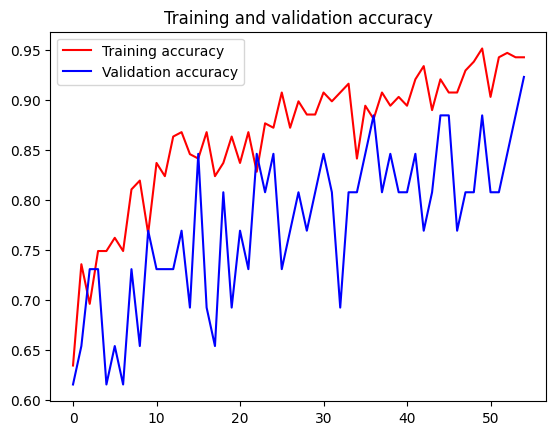

<Figure size 640x480 with 0 Axes>

In [208]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()